# Alphalens Example Tear Sheet

Alphalens is designed to aid in the analysis of "alpha factors," data transformations that are used to predict future price movements of financial instruments. Alpha factors take the form of a single value for each asset on each day. The dimension of these values is not necessarily important. We evaluate an alpha factor by considering daily factor values relative to one another. 

It is important to note the difference between an alpha factor and a trading algorithm. A trading algorithm uses an alpha factor, or combination of alpha factors to generate trades.  Trading algorithms cover execution and risk constraints: the business of turning predictions into profits. Alpha factors, on the other hand, are focused soley on making predictions. This difference in scope lends itself to a difference in the methodologies used to evaluate alpha factors and trading algorithms. Alphalens does not contain analyses of things like transaction costs, capacity, or portfolio construction. Those interested in more implementation specific analyses are encouaged to check out pyfolio (https://github.com/quantopian/pyfolio), a library specifically geared towards the evaluation of trading algorithms. 





In [19]:
%pylab inline --no-import-all
import sys
import alphalens
import pandas as pd
import numpy as np

Populating the interactive namespace from numpy and matplotlib


In this example, we'll analyze a basic momentum factor computed for a universe of 500 large cap stocks. Below is a simple mapping of tickers to sectors.

In [20]:
ticker_sector = {'A': 4, 'AA': 7, 'AAL': 5, 'AAP': 0, 'AAPL': 6, 'ABBV': 4, 'ABC': 4, 'ABT': 4, 'ACN': 6, 'ADBE': 6, 
'ADI': 6, 'ADM': 1, 'ADP': 6, 'ADS': 6, 'ADSK': 6, 'AEE': 9, 'AEP': 9, 'AES': 9, 'AET': 4, 'AFL': 3, 
'AGN': 4, 'AIG': 3, 'AIV': 3, 'AIZ': 3, 'AJG': 3, 'AKAM': 6, 'ALK': 5, 'ALL': 3, 'ALLE': 5, 'ALXN': 4,
'AMAT': 6, 'AME': 5, 'AMG': 3, 'AMGN': 4, 'AMP': 3, 'AMT': 3, 'AMZN': 0, 'AN': 0, 'ANTM': 4, 'AON': 3,
'APA': 2, 'APC': 2, 'APD': 7, 'APH': 5, 'ATVI': 6, 'AVB': 3, 'AVGO': 6, 'AVY': 7, 'AWK': 9, 'AXP': 3,
'AYI': 5, 'AZO': 0, 'BA': 5, 'BAC': 3, 'BAX': 4, 'BBBY': 0, 'BBT': 3, 'BBY': 0, 'BCR': 4, 'BDX': 4,
'BEN': 3, 'BF-B': 1, 'BHI': 2, 'BIIB': 4, 'BK': 3, 'BLK': 3, 'BLL': 7, 'BMY': 4, 'BRK-B': 3, 'BSX': 4,
'BWA': 0, 'BXP': 3, 'C': 3, 'CA': 6, 'CAG': 1, 'CAH': 4, 'CAT': 5, 'CB': 3, 'CBG': 3, 'CBS': 0, 
'CCI': 3, 'CCL': 0, 'CELG': 4, 'CERN': 4, 'CF': 7, 'CFG': 3, 'CHD': 1, 'CHK': 2, 'CHRW': 5, 'CI': 4,
'CINF': 3, 'CL': 1, 'CLX': 1, 'CMA': 3, 'CMCSA': 0, 'CME': 3, 'CMG': 0, 'CMI': 5, 'CMS': 9, 'CNC': 4,
'CNP': 9, 'COF': 3, 'COG': 2, 'COH': 0, 'COL': 5, 'COP': 2, 'COST': 1, 'CPB': 1, 'CPGX': 2, 'CRM': 6,
'CSCO': 6, 'CSRA': 6, 'CSX': 5, 'CTAS': 5, 'CTL': 8, 'CTSH': 6, 'CTXS': 6, 'CVS': 1, 'CVX': 2, 
'CXO': 2, 'D': 9, 'DAL': 5, 'DD': 7, 'DE': 5, 'DFS': 3, 'DG': 0, 'DGX': 4, 'DHI': 0, 'DHR': 5, 
'DIS': 0, 'DISCA': 0, 'DISCK': 0, 'DLPH': 0, 'DLR': 3, 'DLTR': 0, 'DNB': 5, 'DO': 2, 'DOV': 5, 
'DOW': 7, 'DPS': 1, 'DRI': 0, 'DTE': 9, 'DUK': 9, 'DVA': 4, 'DVN': 2, 'EA': 6, 'EBAY': 6, 'ECL': 7,
'ED': 9, 'EFX': 3, 'EIX': 9, 'EL': 1, 'EMC': 6, 'EMN': 7, 'EMR': 5, 'ENDP': 4, 'EOG': 2, 'EQIX': 6,
'EQR': 3, 'EQT': 2, 'ES': 9, 'ESRX': 4, 'ESS': 3, 'ETFC': 3, 'ETN': 5, 'ETR': 9, 'EW': 4, 'EXC': 9,
'EXPD': 5, 'EXPE': 0, 'EXR': 3, 'F': 0, 'FAST': 5, 'FB': 6, 'FBHS': 5, 'FCX': 7, 'FDX': 5, 'FE': 9, 
'FFIV': 6, 'FIS': 6, 'FISV': 6, 'FITB': 3, 'FL': 0, 'FLIR': 5, 'FLR': 5, 'FLS': 5, 'FMC': 7, 
'FOX': 0, 'FOXA': 0, 'FRT': 3, 'FSLR': 6, 'FTI': 2, 'FTR': 8, 'GAS': 9, 'GD': 5, 'GE': 5, 'GGP': 3,
'GILD': 4, 'GIS': 1, 'GLW': 5, 'GM': 0, 'GOOG': 6, 'GOOGL': 6, 'GPC': 0, 'GPN': 6, 'GPS': 0, 
'GRMN': 0, 'GS': 3, 'GT': 0, 'GWW': 5, 'HAL': 2, 'HAR': 0, 'HAS': 0, 'HBAN': 3, 'HBI': 0, 'HCA': 4,
'HCN': 3, 'HCP': 3, 'HD': 0, 'HES': 2, 'HIG': 3, 'HOG': 0, 'HOLX': 4, 'HON': 5, 'HOT': 0, 'HP': 2,
'HPE': 6, 'HPQ': 6, 'HRB': 3, 'HRL': 1, 'HRS': 6, 'HSIC': 4, 'HST': 3, 'HSY': 1, 'HUM': 4, 'IBM': 6,
'ICE': 3, 'IFF': 7, 'ILMN': 4, 'INTC': 6, 'INTU': 6, 'IP': 7, 'IPG': 0, 'IR': 5, 'IRM': 5, 
'ISRG': 4, 'ITW': 5, 'IVZ': 3, 'JBHT': 5, 'JCI': 0, 'JEC': 5, 'JNJ': 4, 'JNPR': 6, 'JPM': 3, 
'JWN': 0, 'K': 1, 'KEY': 3, 'KHC': 1, 'KIM': 3, 'KLAC': 6, 'KMB': 1, 'KMI': 2, 'KMX': 0, 'KO': 1,
'KORS': 0, 'KR': 1, 'KSS': 0, 'KSU': 5, 'L': 3, 'LB': 0, 'LEG': 5, 'LEN': 0, 'LH': 4, 'LKQ': 0, 
'LLL': 5, 'LLTC': 6, 'LLY': 4, 'LM': 3, 'LMT': 5, 'LNC': 3, 'LOW': 0, 'LRCX': 6, 'LUK': 3, 'LUV': 5,
'LVLT': 8, 'LYB': 7, 'M': 0, 'MA': 6, 'MAC': 3, 'MAR': 0, 'MAS': 5, 'MAT': 0, 'MCD': 0, 'MCHP': 6, 
'MCK': 4, 'MCO': 3, 'MDLZ': 1, 'MDT': 4, 'MET': 3, 'MHK': 0, 'MJN': 1, 'MKC': 1, 'MLM': 7, 'MMC': 3, 
'MMM': 5, 'MNK': 4, 'MNST': 1, 'MO': 1, 'MON': 7, 'MOS': 7, 'MPC': 2, 'MRK': 4, 'MRO': 2, 'MS': 3, 
'MSFT': 6, 'MSI': 6, 'MTB': 3, 'MU': 6, 'MUR': 2, 'MYL': 4, 'NAVI': 3, 'NBL': 2, 'NDAQ': 3, 'NEE': 9,
'NEM': 7, 'NFLX': 6, 'NFX': 2, 'NI': 9, 'NKE': 0, 'NLSN': 5, 'NOC': 5, 'NOV': 2, 'NRG': 9, 'NSC': 5, 
'NTAP': 6, 'NTRS': 3, 'NUE': 7, 'NVDA': 6, 'NWL': 0, 'NWS': 0, 'NWSA': 0, 'O': 3, 'OI': 7, 'OKE': 2, 
'OMC': 0, 'ORCL': 6, 'ORLY': 0, 'OXY': 2, 'PAYX': 6, 'PBCT': 3, 'PBI': 5, 'PCAR': 5, 'PCG': 9, 'PCLN': 0, 
'PDCO': 4, 'PEG': 9, 'PEP': 1, 'PFE': 4, 'PFG': 3, 'PG': 1, 'PGR': 3, 'PH': 5, 
'PHM': 0, 'PKI': 4, 'PLD': 3, 'PM': 1, 'PNC': 3, 'PNR': 5, 'PNW': 9, 'PPG': 7, 
'PPL': 9, 'PRGO': 4, 'PRU': 3, 'PSA': 3, 'PSX': 2, 'PVH': 0, 'PWR': 5, 'PX': 7, 'PXD': 2, 
'PYPL': 6, 'QCOM': 6, 'QRVO': 6, 'R': 5, 'RAI': 1, 'RCL': 0, 'REGN': 4, 'RF': 3, 'RHI': 5, 'RHT': 6, 
'RIG': 2, 'RL': 0, 'ROK': 5, 'ROP': 5, 'ROST': 0, 'RRC': 2, 'RSG': 5, 'RTN': 5, 'SBUX': 0, 'SCG': 9,
'SCHW': 3, 'SE': 2, 'SEE': 7, 'SHW': 7, 'SIG': 0, 'SJM': 1, 'SLB': 2, 'SLG': 3, 'SNA': 0, 'SNI': 0,
'SO': 9, 'SPG': 3, 'SPGI': 3, 'SPLS': 0, 'SRCL': 5, 'SRE': 9, 'STI': 3, 'STJ': 4, 'STT': 3, 'STX': 6,
'STZ': 1, 'SWK': 0, 'SWKS': 6, 'SWN': 2, 'SYF': 3, 'SYK': 4, 'SYMC': 6, 'SYY': 1, 'T': 8, 'TAP': 1,
'TDC': 6, 'TDG': 5, 'TE': 9, 'TEL': 6, 'TGNA': 0, 'TGT': 0, 'TIF': 0, 'TJX': 0, 'TMK': 3, 'TMO': 4,
'TRIP': 0, 'TROW': 3, 'TRV': 3, 'TSCO': 0, 'TSN': 1, 'TSO': 2, 'TSS': 6, 'TWX': 0, 'TXN': 6, 'TXT': 5,
'TYC': 5, 'UA': 0, 'UAL': 5, 'UDR': 3, 'UHS': 4, 'ULTA': 0, 'UNH': 4, 'UNM': 3, 'UNP': 5, 'UPS': 5,
'URBN': 0, 'URI': 5, 'USB': 3, 'UTX': 5, 'V': 6, 'VAR': 4, 'VFC': 0, 'VIAB': 0, 'VLO': 2, 'VMC': 7, 
'VNO': 3, 'VRSK': 5, 'VRSN': 6, 'VRTX': 4, 'VTR': 3, 'VZ': 8, 'WAT': 4, 'WBA': 1, 'WDC': 6, 'WEC': 9,
'WFC': 3, 'WFM': 1, 'WHR': 0, 'WLTW': 3, 'WM': 5, 'WMB': 2, 'WMT': 1, 'WRK': 7, 'WU': 6, 'WY': 3, 
'WYN': 0, 'WYNN': 0, 'XEC': 2, 'XEL': 9, 'XL': 3, 'XLNX': 6, 'XOM': 2, 'XRAY': 4, 'XRX': 6, 'XYL': 5,
 'YHOO': 6, 'YUM': 0, 'ZBH': 4, 'ZION': 3, 'ZTS': 4}

In [21]:
import pandas_datareader.data as web
pan = web.DataReader(ticker_sector.keys(), "yahoo", '2014-12-01')

/home/lucasca/dev/xCorr/venv/lib/python3.4/site-packages/pandas_datareader/base.py:192: SymbolWarning: Failed to read symbol: 'CPGX', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)
/home/lucasca/dev/xCorr/venv/lib/python3.4/site-packages/pandas_datareader/base.py:192: SymbolWarning: Failed to read symbol: 'TE', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)
/home/lucasca/dev/xCorr/venv/lib/python3.4/site-packages/pandas_datareader/base.py:192: SymbolWarning: Failed to read symbol: 'GAS', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)


In [22]:
pan = pan.transpose(2,1,0)

In [23]:
momentum_factor = (pan.loc[:,:,'Close'] - pan.loc[:,:,'Open']) / (pan.loc[:,:,'High'] - pan.loc[:,:,'Low'])
momentum_factor = momentum_factor.iloc[:-11]

# To be conservative, we say that we observe a factor before trading starts the next morning. 
momentum_factor = momentum_factor.shift().iloc[1:]

momentum_factor = momentum_factor.stack()
momentum_factor.index = momentum_factor.index.set_names(['date', 'asset'])

In [24]:
momentum_factor.head()

date        asset
2014-01-03  A       -0.936841
            AA       0.000000
            AAL      0.381580
            AAP     -0.239384
            AAPL    -0.508986
dtype: float64

The pricing data passed to alphalens should reflect the next available price after a factor value was observed at a given timestamp. The price must not be included in the calculation of the factor for that time. Always double check to ensure you are not introducing lookahead bias to your study.

In our example, before trading starts on 2014-12-2, we observe yesterday, 2014-12-1's factor value. The price we should pass to alphalens is the next available price after that factor observation: the open price on 2014-12-2.

In [25]:
pricing = pan.loc[:,:,'Open'].iloc[1:]
pricing.head()

A     AA        AAL         AAP        AAPL       ABBV  \
Date                                                                         
2014-01-03  56.389993  10.54  25.750000  111.230003  552.860023  52.250000   
2014-01-06  57.400005  10.63  26.620001  113.099998  537.450005  52.700001   
2014-01-07  56.950005  10.55  27.200001  111.980003  544.320015  50.840000   
2014-01-08  57.330010  10.50  26.370001  112.470001  538.809982  50.630001   
2014-01-09  58.399996  10.83  28.240000  113.059998  546.800018  50.590000   

                  ABC        ABT        ACN       ADBE    ...           XLNX  \
Date                                                      ...                  
2014-01-03  69.889999  38.369999  81.209999  59.189999    ...      45.910000   
2014-01-06  70.339996  39.189999  81.309998  58.060001    ...      45.779999   
2014-01-07  69.820000  39.230000  80.839996  58.259998    ...      45.459999   
2014-01-08  70.330002  38.849998  81.290001  59.119999    ...      45.330002   
2014-01-09  71.449997  39.270000  82.019997  58.990002    ...      46.000000   

                   XOM       XRAY    XRX        XYL       YHOO        YUM  \
Date                                                                        
2014-01-03   99.769997  48.240002  11.93  34.150002  40.160000  75.459999   
2014-01-06   99.940002  48.320000  12.04  34.639999  40.049999  75.519997   
2014-01-07   99.610001  48.049999  12.11  34.470001  40.080002  76.889999   
2014-01-08  101.190002  48.750000  12.20  34.439999  41.290001  76.680000   
2014-01-09  100.199997  48.669998  12.10  34.549999  41.330002  74.910004   

                  ZBH       ZION        ZTS  
Date                                         
2014-01-03  92.580002  29.740000  32.340000  
2014-01-06  93.790001  29.950001  32.299999  
2014-01-07  93.419998  29.879999  32.189999  
2014-01-08  95.809998  29.700001  31.709999  
2014-01-09  97.500000  30.150000  31.830000  

[5 rows x 504 columns]

Often, we'd want to know how our factor looks across various groupings (sectors, industires, countries, etc.), in this example let's use sectors. To generate sector level breakdowns, you'll need to pass alphalens a sector mapping for each traded name. 

This mapping can come in the form of a MultiIndexed Series (with the same date/symbol index as your factor value) if you want to provide a sector mapping for each symbol on each day. 

If you'd like to use constant sector mappings, you may pass symbol to sector mappings as a dict.

If your sector mappings come in the form of codes (as they do in this tutorial), you may also pass alphalens a dict of sector names to use in place of sector codes.

In [26]:
sector_names = {0: 'Consumer Discretionary',
                1: 'Consumer Staples',
                2: 'Energy',
                3: 'Financials',
                4: 'Health Care',
                5: 'Industrials',
                6: 'Information Technology',
                7: 'Materials',
                8: 'Telecommunications Services',
                9: 'Utilities'}

## Formatting input data

Alphalens contains a handy data formatting function to transform your factor and pricing data into the exact inputs expected by the rest of the plotting and performance functions. This `get_clean_factor_and_forward_returns` function is the first call in `create_factor_tear_sheet`.

In [27]:
factor, forward_returns = alphalens.utils.get_clean_factor_and_forward_returns(momentum_factor, pricing, 
                                                            groupby=ticker_sector, groupby_labels=sector_names)

Let's see what that gave us...

In [28]:
factor.head()

date        asset  group                 
2014-01-03  A      Health Care              -0.936841
            AA     Materials                 0.000000
            AAL    Industrials               0.381580
            AAP    Consumer Discretionary   -0.239384
            AAPL   Information Technology   -0.508986
Name: factor, dtype: float64

In [29]:
forward_returns.head()

1         5         10
date       asset group                                               
2014-01-03 A     Health Care             0.017911  0.007409  0.007608
           AA    Materials               0.008539 -0.010859  0.004554
           AAL   Industrials             0.033786  0.024410  0.012999
           AAP   Consumer Discretionary  0.016812  0.005425  0.005764
           AAPL  Information Technology -0.027873 -0.004759 -0.000250

You'll notice that our factor doesn't look much different. The only addition here is an index level describing the sector of each name. That will come in handy as we perform group level reductions in our performance and plotting functions. 

The forward_returns dataframe represents the mean daily price change for the N days after a timestamp. The 1 day forward return for AAPL on 2014-12-2 is the percent change in the AAPL open price on 2014-12-2 and the AAPL open price on 2014-12-3. The 5 day forward return is the percent change from open 2014-12-2 to open 2014-12-9 (5 trading days) divided by 5.

# Returns Analysis

Returns analysis gives us a raw description of a factor's value that shows us the power of a factor in real currency values.

In [30]:
quantiles = 5

In [31]:
quantized_factor = alphalens.performance.quantize_factor(factor, quantiles=quantiles)

In [32]:
quantized_factor.head()

date        asset  group                 
2014-01-03  A      Health Care               1
            AA     Materials                 4
            AAL    Industrials               5
            AAP    Consumer Discretionary    4
            AAPL   Information Technology    3
Name: quantile, dtype: int64

One of the most basic ways to look at a factor's predicitve power is to look at the mean return of different factor quantile. 

In [33]:
mean_return_by_q_daily, std_err = alphalens.performance.mean_return_by_quantile(quantized_factor, forward_returns,
                                                                                by_date=True,
                                                                                by_group=False)

In [34]:
mean_return_by_q_daily.head()

1         5         10
date       quantile                              
2014-01-03 1        -0.002439  0.000090  0.000315
           2         0.000121 -0.000308 -0.000193
           3         0.000756 -0.000349  0.000253
           4         0.001004 -0.000307 -0.000096
           5         0.000518  0.000978 -0.000295

In [35]:
mean_return_by_q, std_err_by_q = alphalens.performance.mean_return_by_quantile(quantized_factor,
                                                                               forward_returns,
                                                                               by_group=False)

In [36]:
mean_return_by_q.head()

1         5         10
quantile                              
1        -0.000062 -0.000039 -0.000037
2         0.000017  0.000049  0.000025
3         0.000016  0.000028 -0.000004
4        -0.000087  0.000018  0.000034
5         0.000116 -0.000056 -0.000018

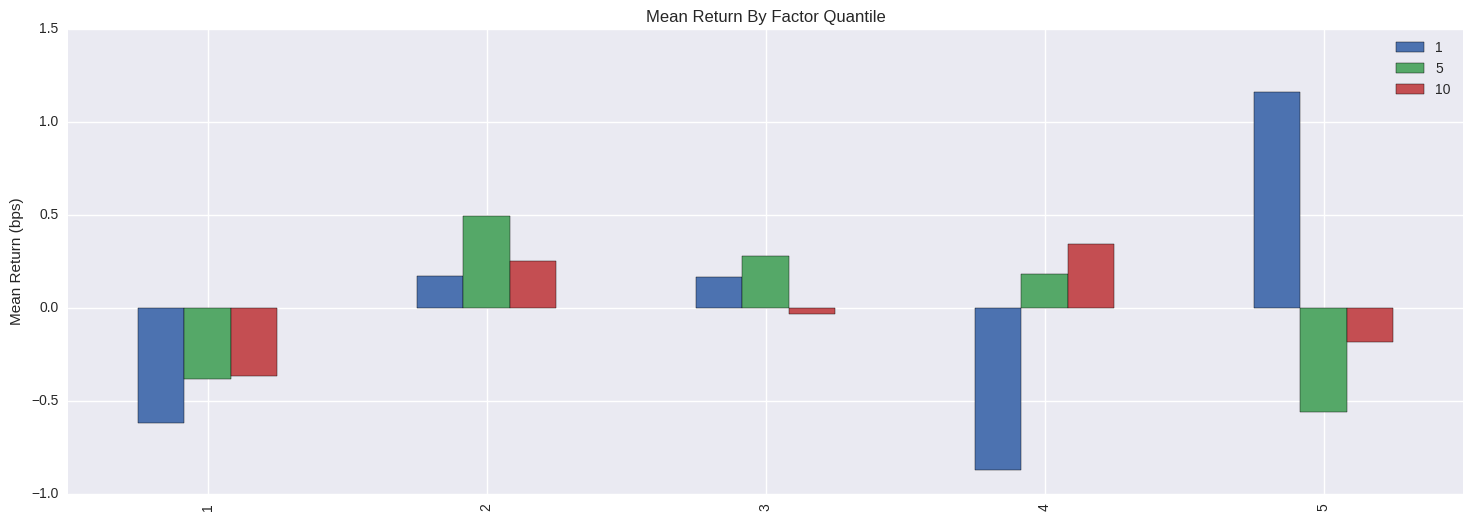

In [37]:
alphalens.plotting.plot_quantile_returns_bar(mean_return_by_q);

By looking at the mean return by quantile we can get a real look at how well the factor differentiates forward returns across the signal values. Obviously we want securities with a better signal to exhibit higher returns. For a good factor we'd expect to see negative values in the lower quartiles and positive values in the upper quantiles.

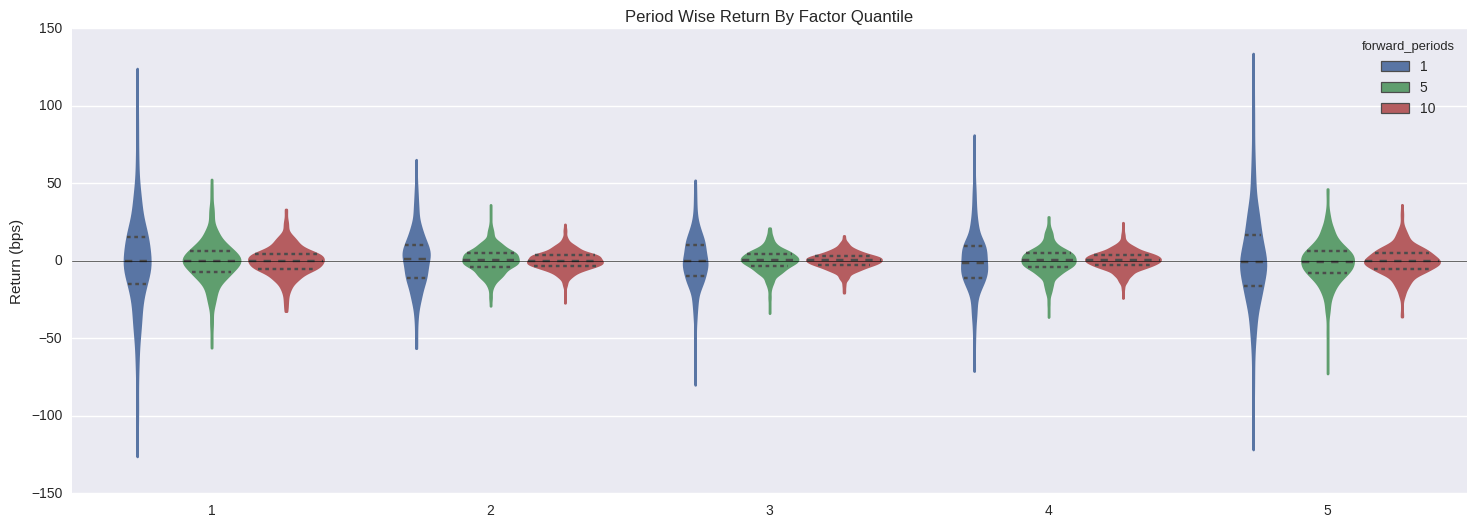

In [38]:
alphalens.plotting.plot_quantile_returns_violin(mean_return_by_q_daily);

This violin plot is similar to the one before it but shows more information about the underlying data. It gives a better idea about the range of values, the median, and the inter-quartile range. What gives the plots their shape is the application of a probability density of the data at different values.

In [39]:
quant_return_spread, std_err_spread = alphalens.performance.compute_mean_returns_spread(mean_return_by_q_daily, 5, 1, std_err)

/home/lucasca/dev/alphalens/alphalens/plotting.py:491: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=22).mean()
  pd.rolling_mean(mean_returns_spread_bps, 22).plot(color='orangered',


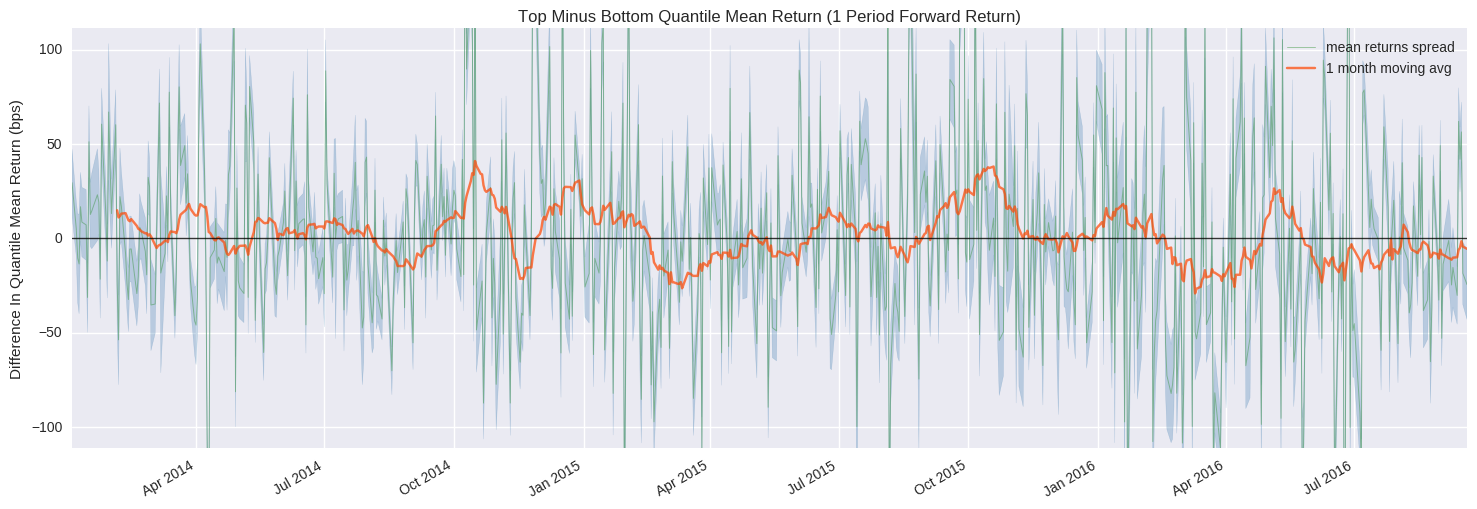

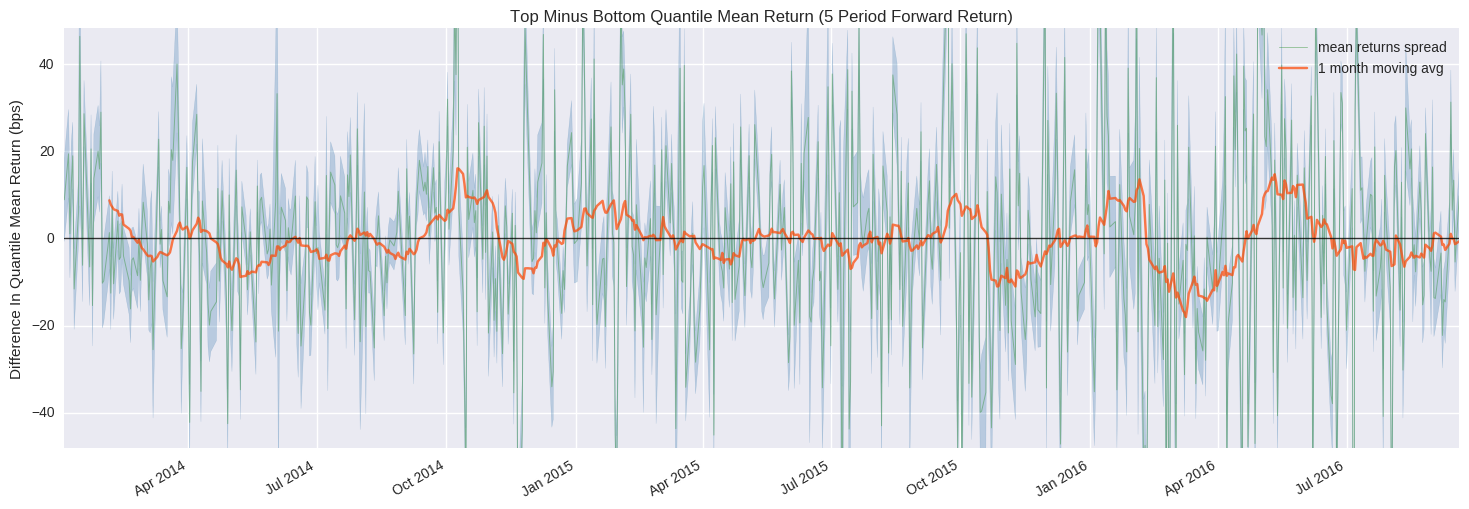

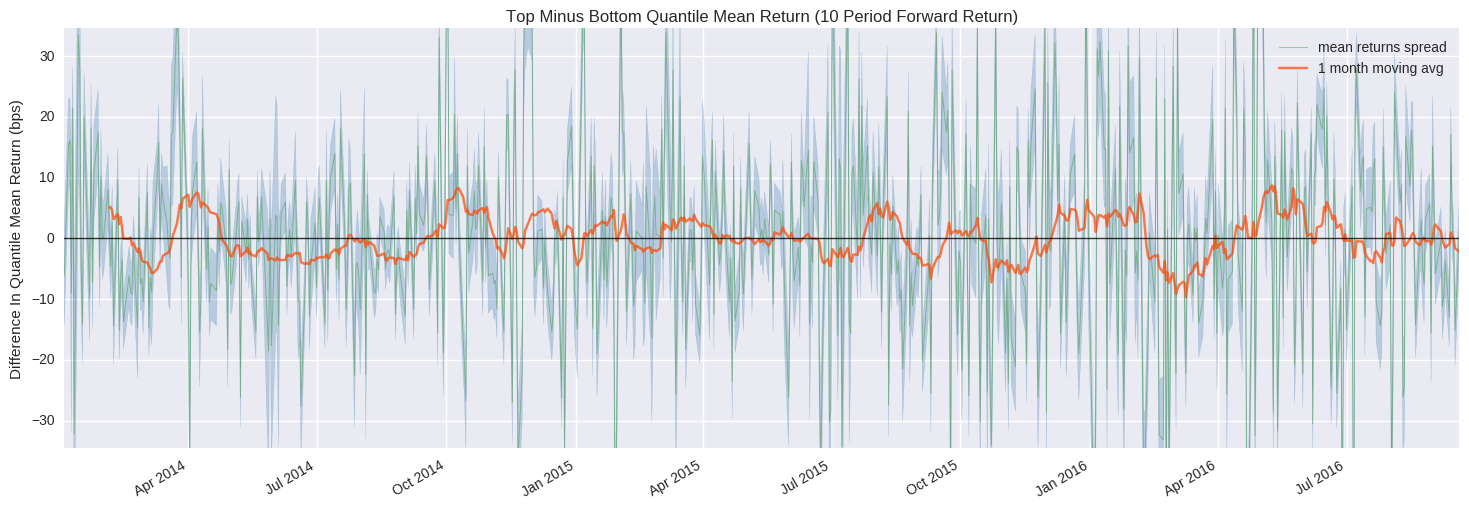

In [40]:
alphalens.plotting.plot_mean_quantile_returns_spread_time_series(quant_return_spread, std_err_spread);

This rolling forward returns spread graph allows us to look at the raw spread in basis points between the top and bottom quantiles over time. The green line is the returns spread while the orange line is a 1 month average to smooth the data and make it easier to visualize.

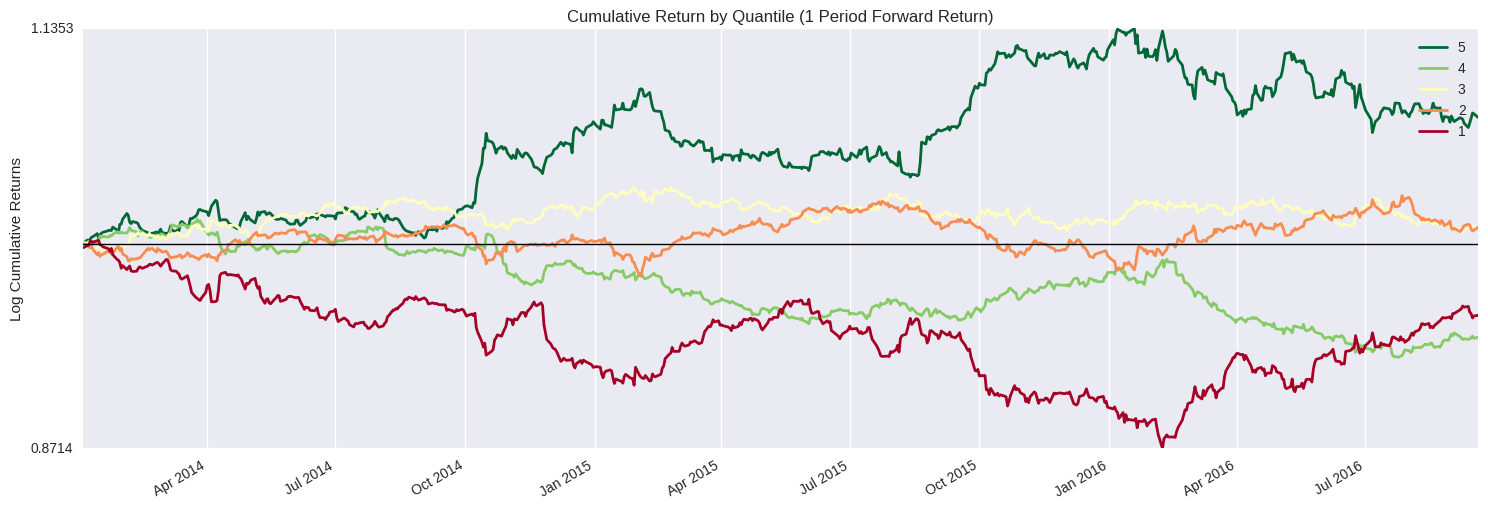

In [41]:
alphalens.plotting.plot_cumulative_returns_by_quantile(mean_return_by_q_daily);

By looking at the cumulative returns by factor quantile we can get an intuition for which quantiles are contributing the most to the factor and at what time. Ideally we would like to see a these curves originate at the same value on the left and spread out like a fan as they move to the right through time, with the higher quantiles on the top.

In [42]:
ls_factor_returns = alphalens.performance.factor_returns(factor, forward_returns)

In [43]:
ls_factor_returns.head()

1         5         10
date                                    
2014-01-03  0.000690  0.000167 -0.000370
2014-01-06  0.000081  0.000845  0.000541
2014-01-07 -0.000309  0.000326  0.000987
2014-01-08 -0.000743  0.000442  0.000003
2014-01-09  0.000360  0.000974  0.000865

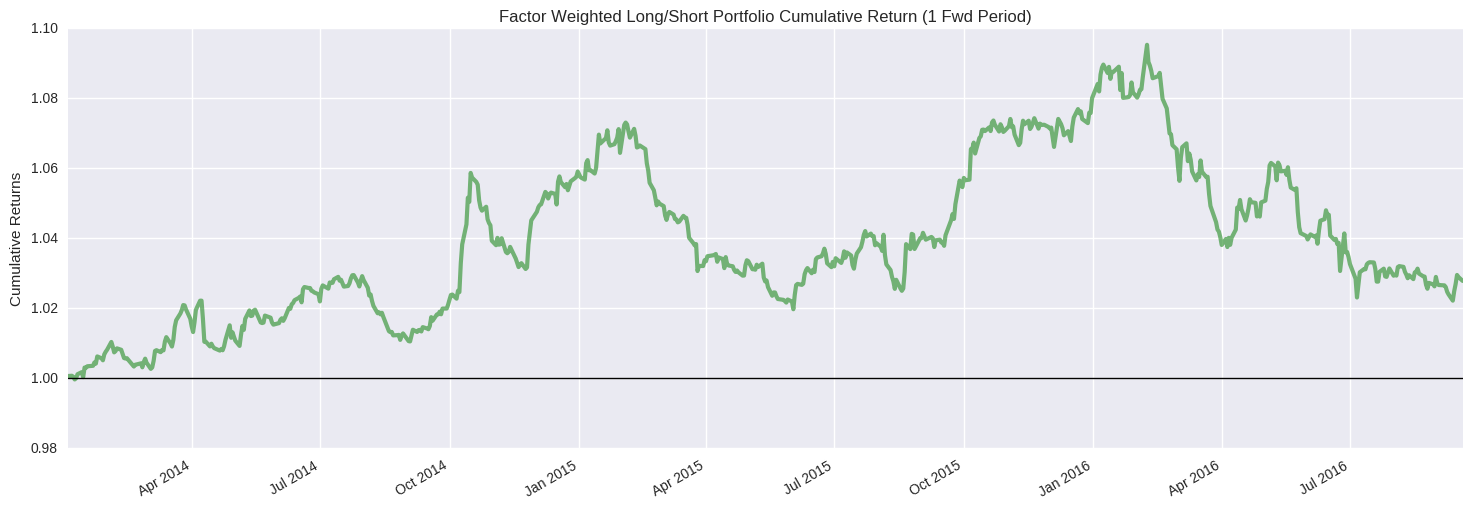

In [44]:
alphalens.plotting.plot_cumulative_returns(ls_factor_returns[1]);

While looking at quantiles is important we must also look at the factor returns as a whole. The cumulative factor long/short returns plot lets us view the combined effects overtime of our entire factor.

In [45]:
alpha_beta = alphalens.performance.factor_alpha_beta(factor, forward_returns,
                                                     factor_returns=ls_factor_returns)

In [46]:
alpha_beta

1         5         10
Ann. alpha  0.014071 -0.001225  0.002155
beta       -0.042205 -0.056051 -0.040791

A very important part of factor returns analysis is determing the alpha, and how significant it is. Here we surface the annualized alpha, beta, and t-stat for the alpha.

# Information Analysis

Information Analysis is a way for us to evaluate the predicitive value of a factor without the confounding effects of transaction costs. The main way we look at this is through the Information Coefficient (IC).

From Wikipedia...

>The information coefficient (IC) is a measure of the merit of a predicted value. In finance, the information coefficient is used as a performance metric for the predictive skill of a financial analyst. The information coefficient is similar to correlation in that it can be seen to measure the linear relationship between two random variables, e.g. predicted stock returns and the actualized returns. The information coefficient ranges from 0 to 1, with 0 denoting no linear relationship between predictions and actual values (poor forecasting skills) and 1 denoting a perfect linear relationship (good forecasting skills).

In [47]:
ic = alphalens.performance.factor_information_coefficient(factor, forward_returns)

In [48]:
ic.head()

1         5         10
date                                    
2014-01-03  0.105817  0.047036  0.001306
2014-01-06  0.016658  0.105965  0.110120
2014-01-07  0.064650  0.079605  0.146558
2014-01-08 -0.019454  0.121408  0.125793
2014-01-09  0.022098  0.118247  0.113155

/home/lucasca/dev/alphalens/alphalens/plotting.py:202: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=22).mean()
  pd.rolling_mean(ic, 22).plot(ax=a,


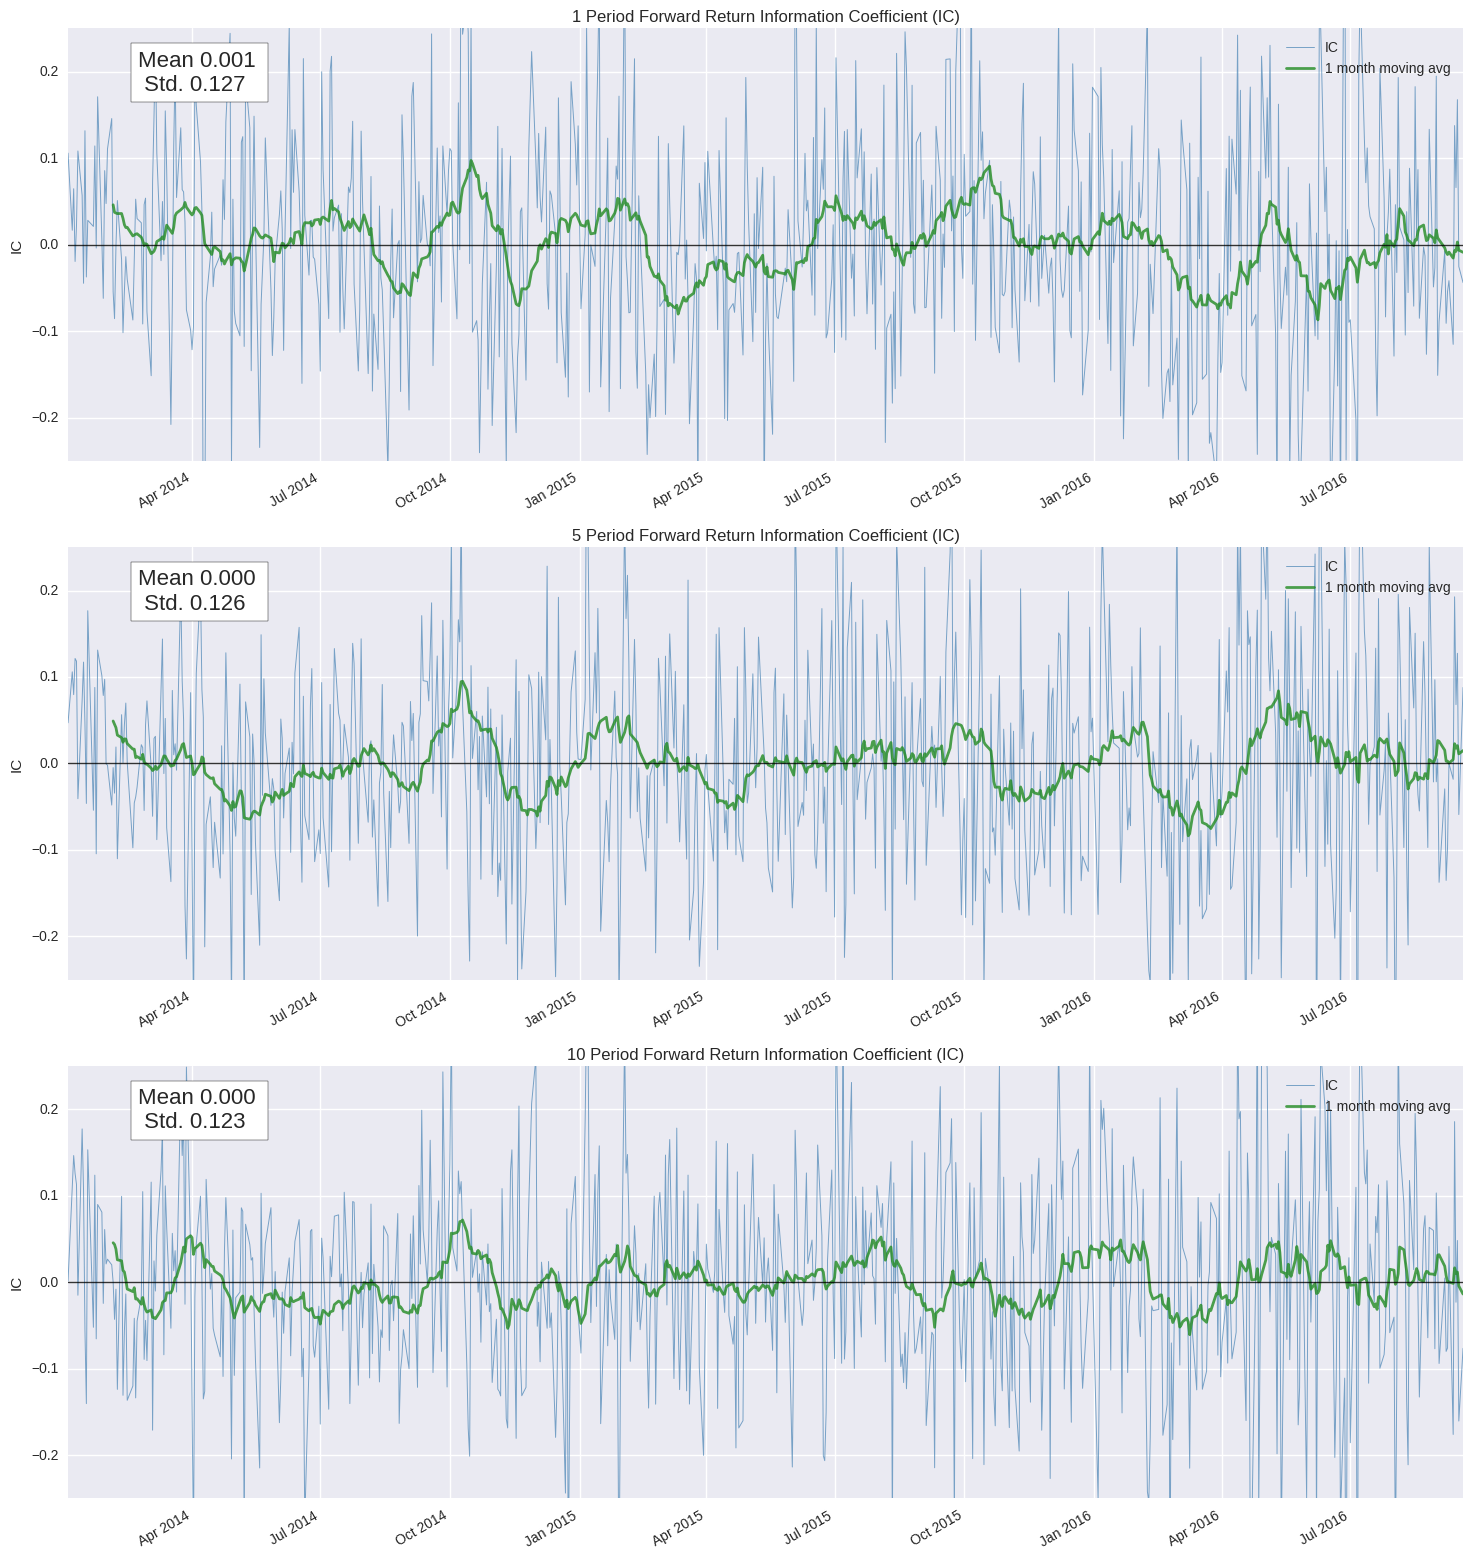

In [49]:
alphalens.plotting.plot_ic_ts(ic);

By looking at the IC each day we can understand how theoretically predicitive our factor is overtime. We like our mean IC to be high and the standard deviation, or volatility of it, to be low. We want to find consistently predictive factors.

/home/lucasca/dev/xCorr/venv/lib/python3.4/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


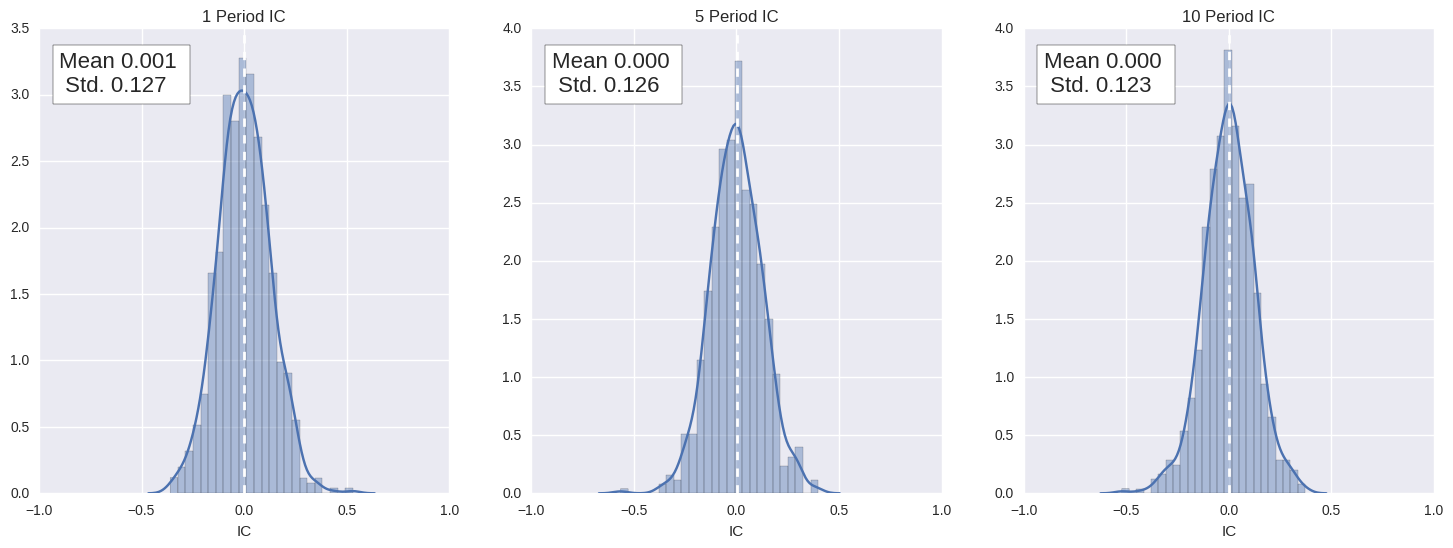

In [50]:
alphalens.plotting.plot_ic_hist(ic);

Looking at a histogram of the daily IC values can indicate how the factor behaves most of the time, where the likely IC values will fall, it also allows us to see if the factor has fat tails.

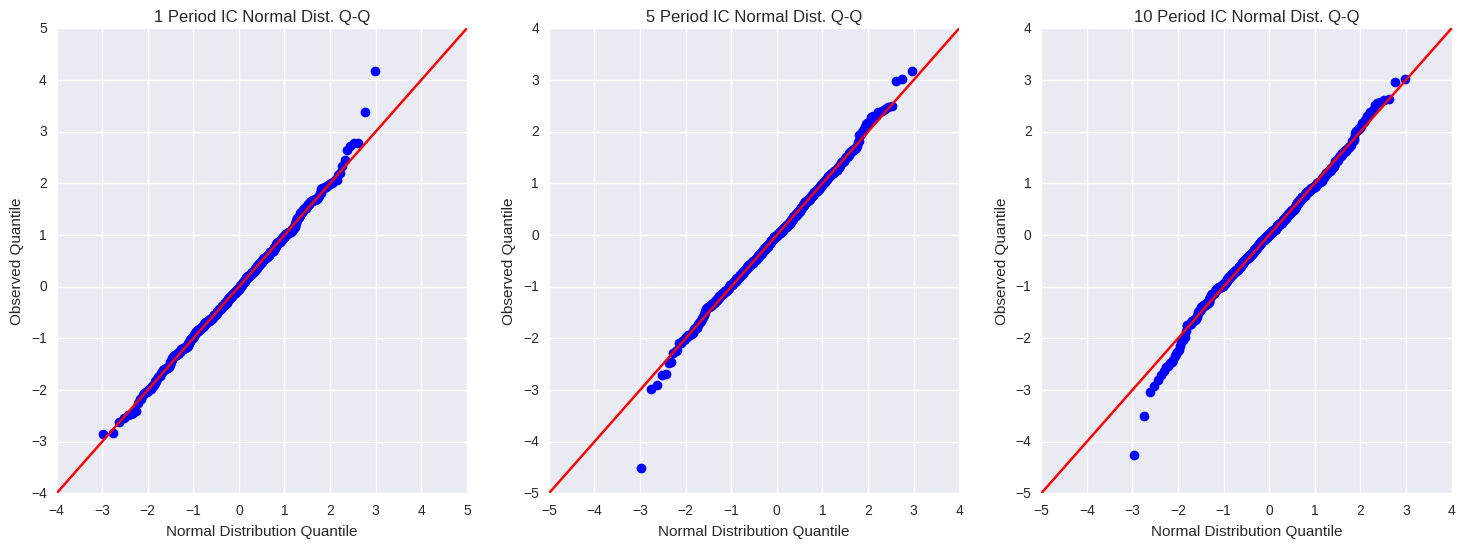

In [51]:
alphalens.plotting.plot_ic_qq(ic);

These Q-Q plots show the difference in shape between the distribution of IC values and a normal distribution. This is especially helpful in seeing how the most extreme values in the distribution affect the predicitive power.

In [52]:
mean_monthly_ic = alphalens.performance.mean_information_coefficient(factor, forward_returns, by_time='M')

In [53]:
mean_monthly_ic.head()

1         5         10
date                                    
2014-01-31  0.046120  0.056649  0.049252
2014-02-28 -0.012383 -0.005880 -0.045619
2014-03-31  0.041757  0.005593  0.060738
2014-04-30 -0.013694 -0.049986 -0.038131
2014-05-31 -0.011698 -0.034723 -0.012368

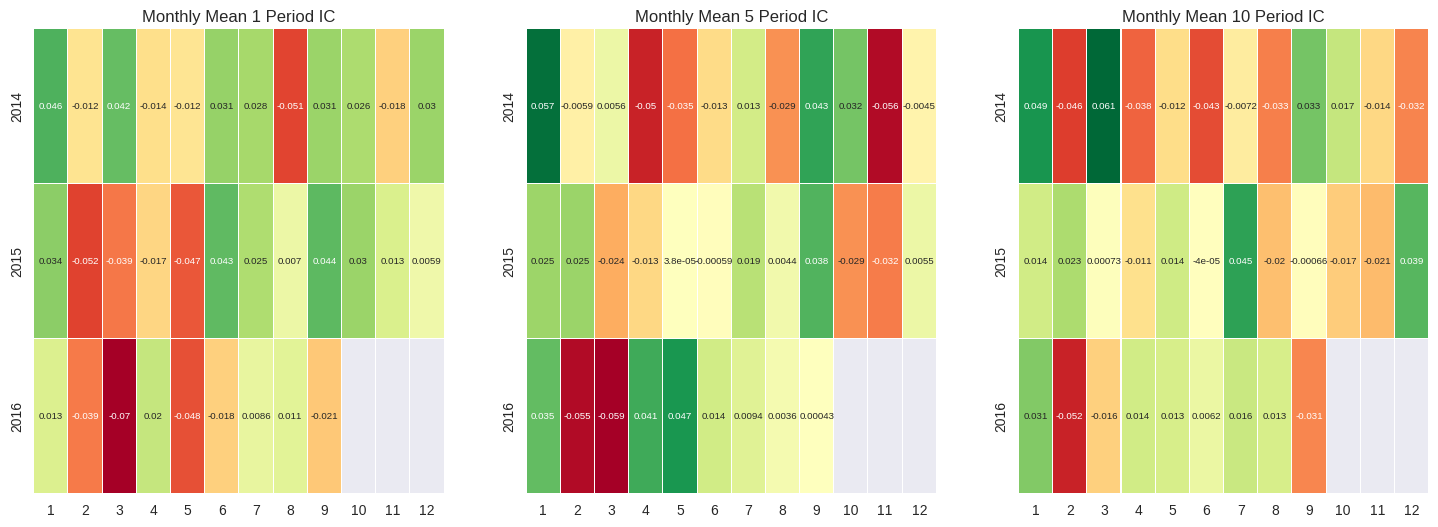

In [54]:
alphalens.plotting.plot_monthly_ic_heatmap(mean_monthly_ic);

By displaying the IC data in heatmap format we can get an idea about the consistency of the factor, and how it behaves during different market regimes/seasons.

# Turnover Analysis

Turnover Analysis gives us an idea about the nature of a factor's makeup and how it changes.

In [55]:
turnover_period = 1

In [56]:
quantile_turnover = pd.concat([alphalens.performance.quantile_turnover(quantized_factor, q, period=turnover_period)
                               for q in range(1, quantiles + 1)], axis=1)

In [57]:
quantile_turnover.head()

1         2         3         4         5
date                                                        
2014-01-03       NaN       NaN       NaN       NaN       NaN
2014-01-06  0.816327  0.765306  0.785714  0.806122  0.785714
2014-01-07  0.836735  0.836735  0.785714  0.857143  0.775510
2014-01-08  0.755102  0.785714  0.836735  0.734694  0.775510
2014-01-09  0.775510  0.775510  0.795918  0.755102  0.785714

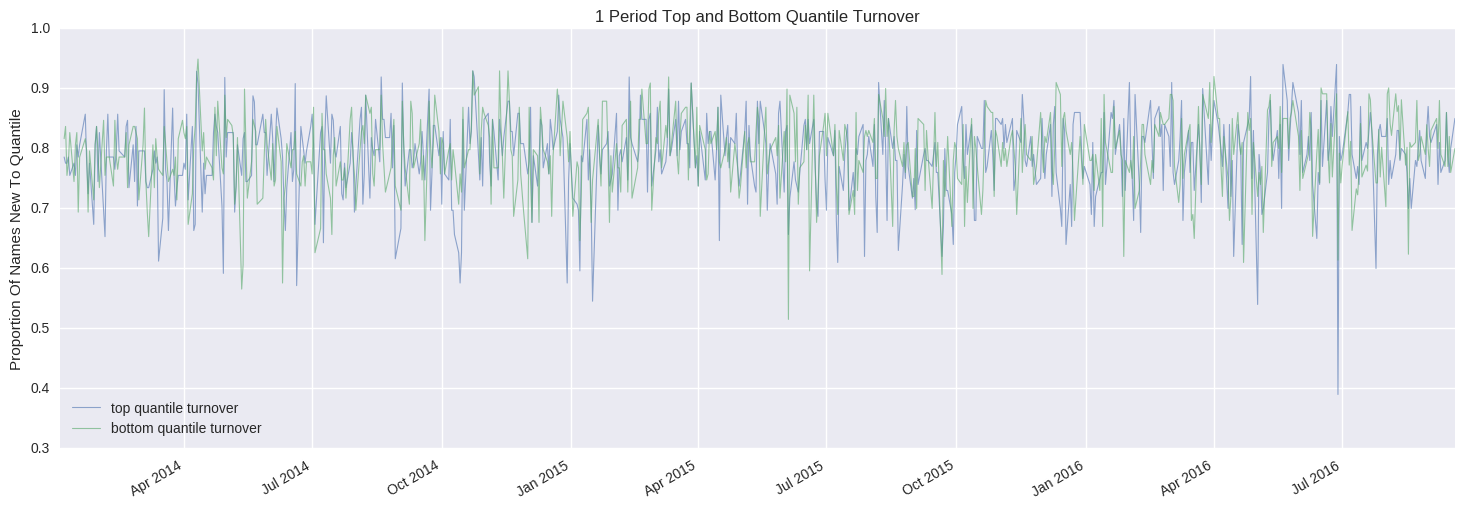

In [58]:
alphalens.plotting.plot_top_bottom_quantile_turnover(quantile_turnover, period=turnover_period)

Factor turnover is important as it indicates the incorporation of new information and the make up of the extremes of a signal. By looking at the new additions to the sets of top and bottom quantiles we can see how much of this factor is getting remade everyday.

In [59]:
factor_autocorrelation = alphalens.performance.factor_rank_autocorrelation(factor, period=turnover_period)

In [60]:
factor_autocorrelation.head()

date
2014-01-03         NaN
2014-01-06    0.071145
2014-01-07    0.047764
2014-01-08    0.104852
2014-01-09    0.017558
Name: 1, dtype: float64

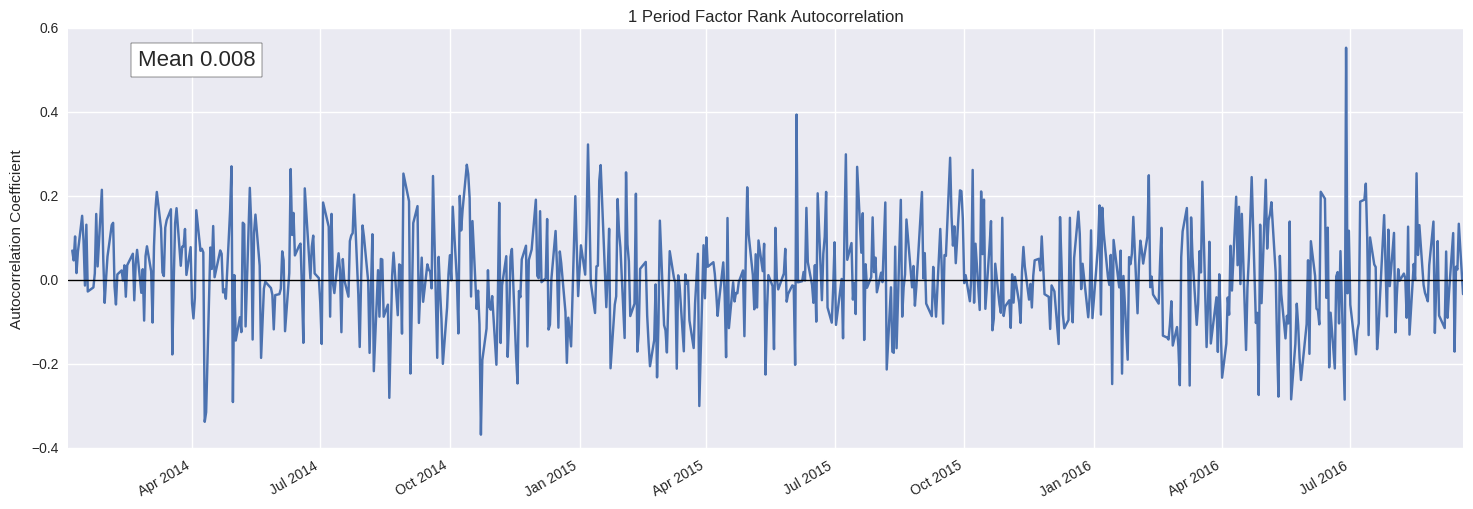

In [61]:
alphalens.plotting.plot_factor_rank_auto_correlation(factor_autocorrelation);

The autocorrelation of the factor indicates to us the persistence of the signal itself.

# Groupwise

Many of the plots in Alphalens can be viewed on their own by grouping if grouping information is provided.

In [62]:
ic_by_sector = alphalens.performance.mean_information_coefficient(factor, forward_returns, by_group=True)

In [63]:
ic_by_sector.head()

1         5         10
group                                               
Consumer Discretionary -0.003005  0.003328 -0.006031
Consumer Staples       -0.008906 -0.012089 -0.009491
Energy                  0.019249  0.012035  0.014023
Financials              0.015801  0.016693  0.019022
Health Care            -0.001961 -0.008280 -0.012500

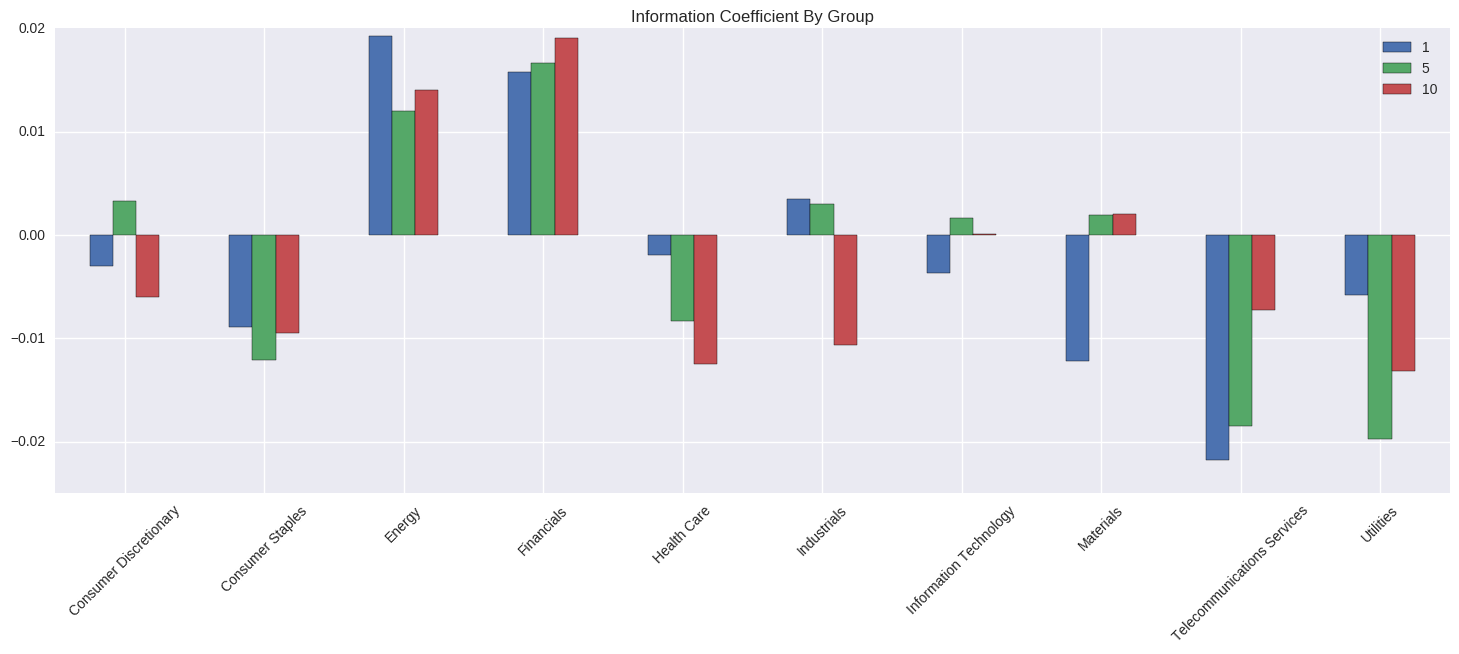

In [64]:
alphalens.plotting.plot_ic_by_group(ic_by_sector);

In [65]:
mean_return_quantile_sector, mean_return_quantile_sector_err = alphalens.performance.mean_return_by_quantile(quantized_factor, 
                                                                            forward_returns, by_group=True)

In [66]:
mean_return_quantile_sector.head()

1         5         10
group                  quantile                              
Consumer Discretionary 1        -0.000021 -0.000069 -0.000036
                       2         0.000148  0.000106  0.000068
                       3         0.000134 -0.000035  0.000014
                       4        -0.000317  0.000074  0.000005
                       5         0.000049 -0.000076 -0.000052

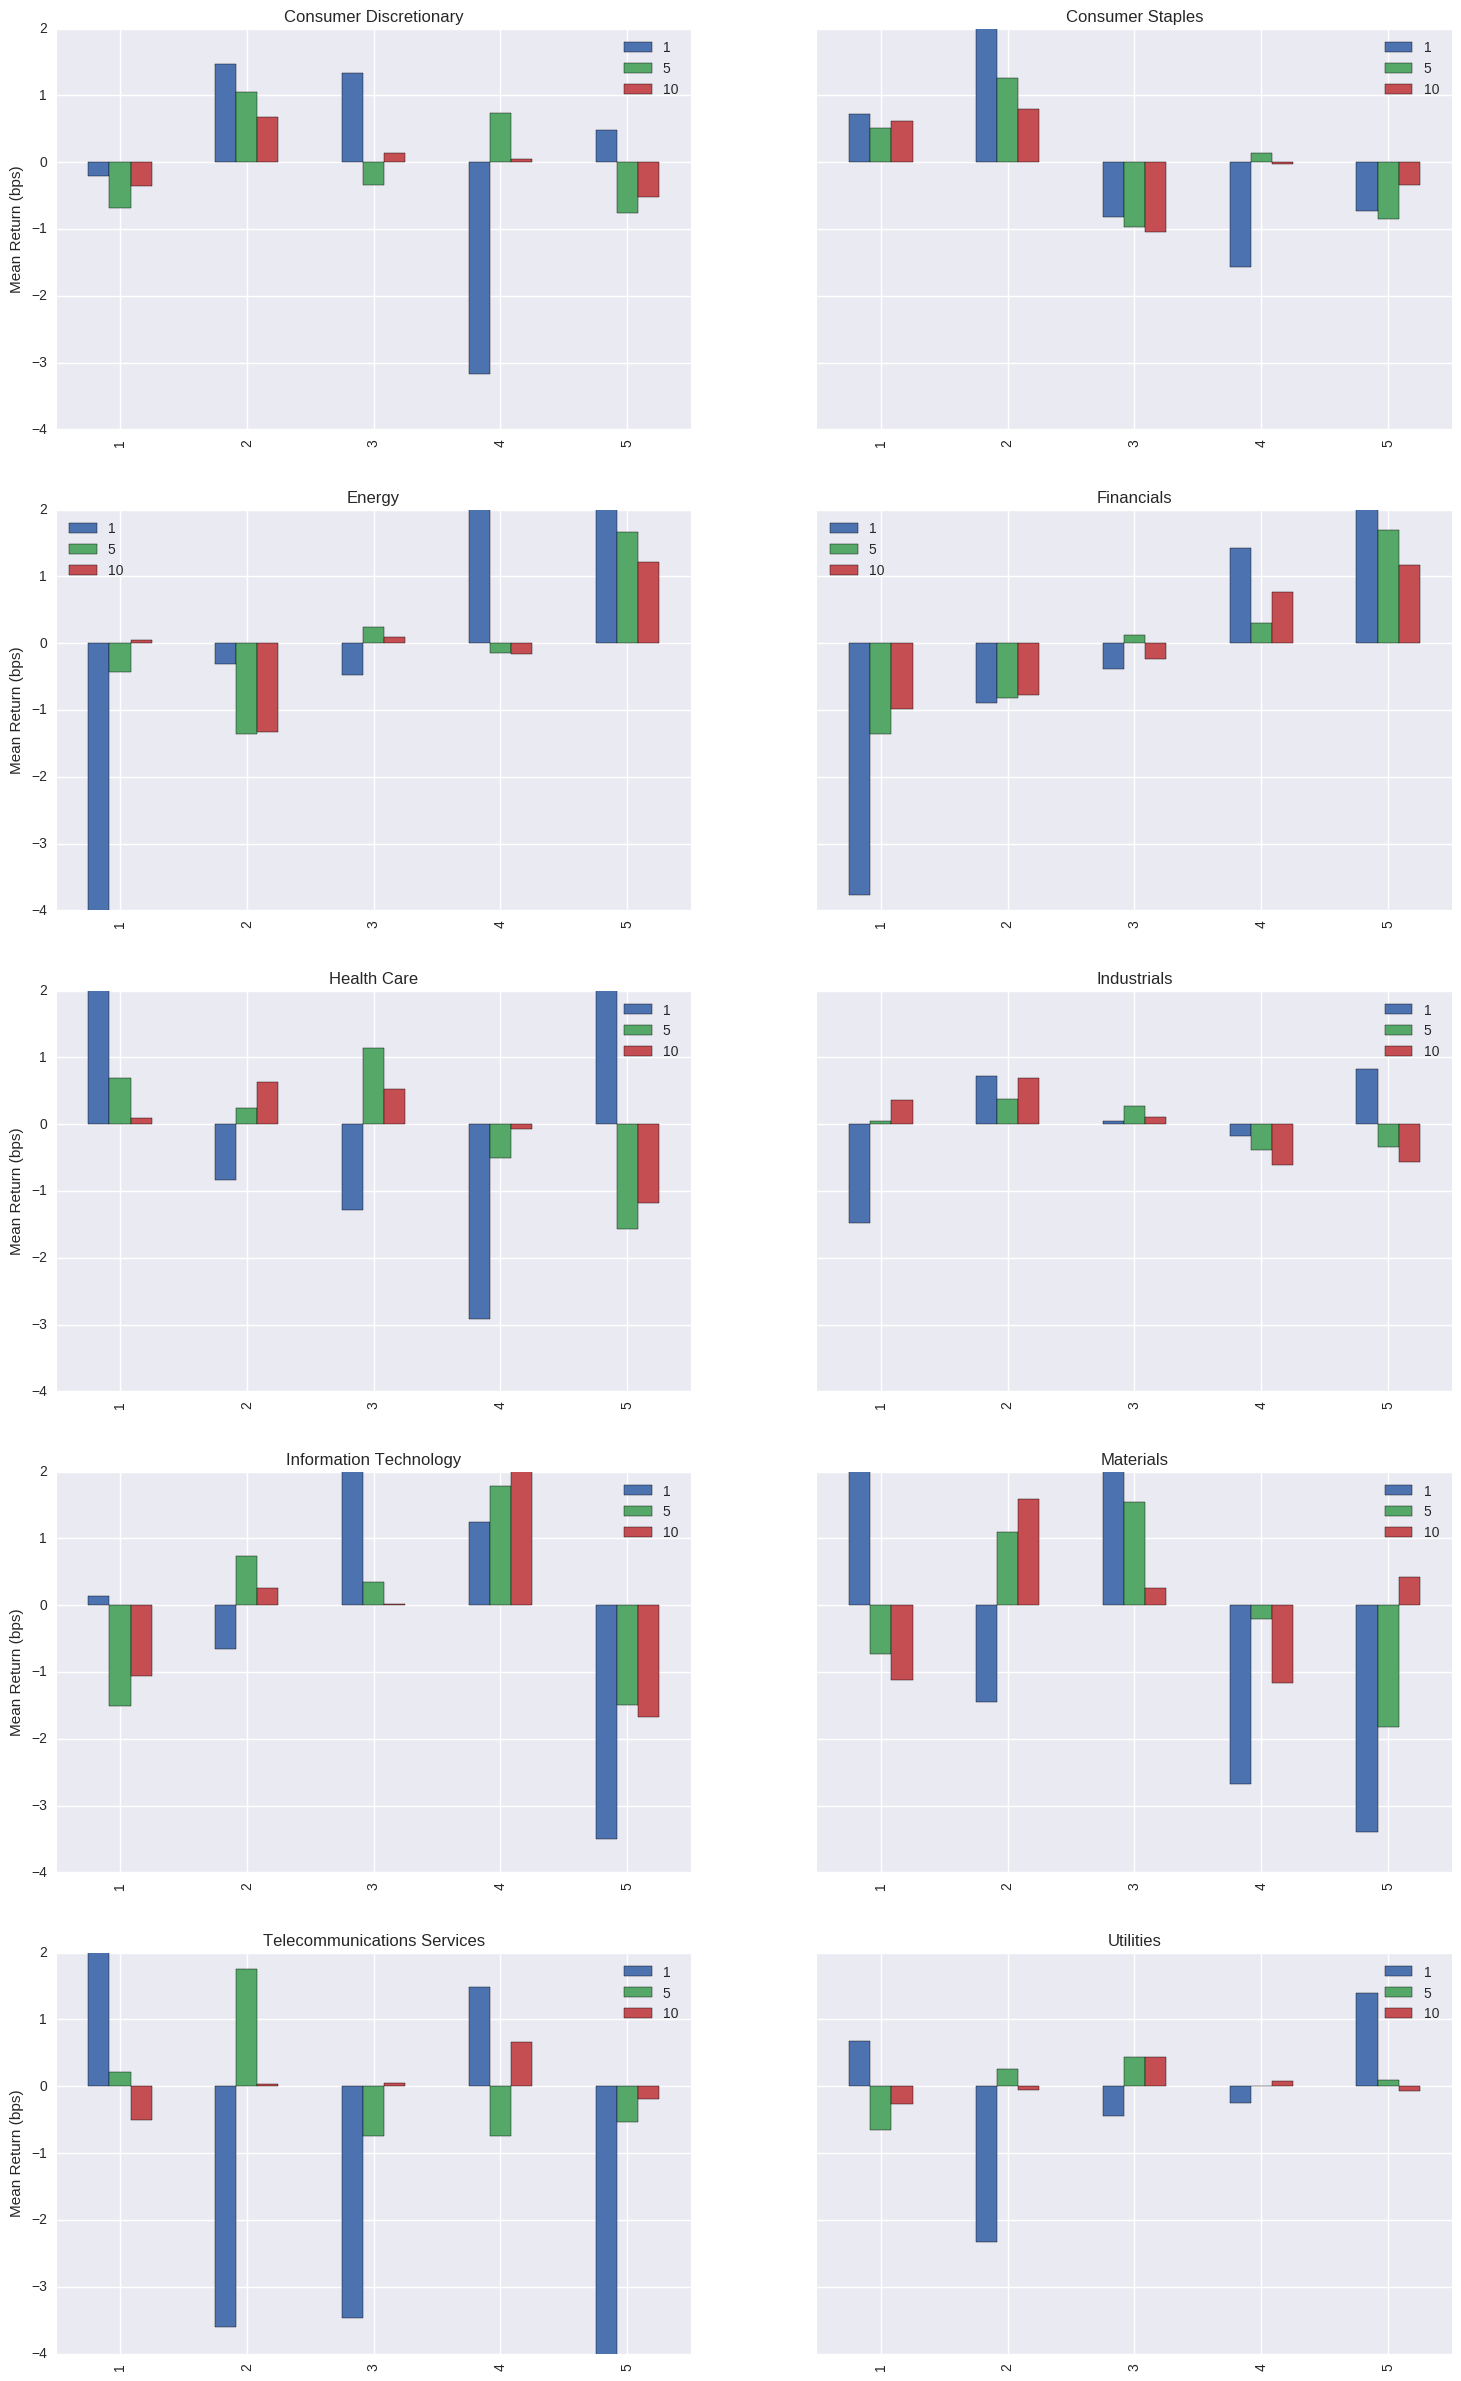

In [67]:
alphalens.plotting.plot_quantile_returns_bar(mean_return_quantile_sector, by_group=True);

# The Whole Thing

The factor tear sheet is the main interface to Alphalens. By passing the factor data and pricing you can analyze all of the above statistics and plots at once.

Returns Analysis


1      5      10
Ann. alpha                                     0.018 -0.001  0.002
beta                                          -0.043 -0.056 -0.041
Mean Period Wise Return Top Quantile (bps)     1.258 -0.596 -0.202
Mean Period Wise Return Bottom Quantile (bps) -0.759 -0.321 -0.331
Mean Period Wise Spread (bps)                  2.033 -0.271  0.128

Information Analysis


1      5      10
IC Mean      0.002  0.000  0.000
IC Std.      0.127  0.125  0.123
t-stat(IC)   0.324  0.096  0.074
p-value(IC)  0.746  0.923  0.941
IC Skew      0.148 -0.032 -0.172
IC Kurtosis  0.344  0.576  0.732
Ann. IR      0.197  0.059  0.045

Turnover Analysis


1      5     10
Quantile 1 Mean Turnover   0.793  0.792  0.789
Quantile 2 Mean Turnover   0.797  0.801  0.798
Quantile 3 Mean Turnover   0.796  0.795  0.796
Quantile 4 Mean Turnover   0.799  0.798  0.796
Quantile 5 Mean Turnover   0.788  0.796  0.793

1      5    10
Mean Factor Rank Autocorrelation  0.008  0.005  0.01

/home/lucasca/dev/alphalens/alphalens/plotting.py:700: FutureWarning: pd.rolling_apply is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=5,min_periods=1).apply(func=<function>,args=<tuple>,kwargs=<dict>)
  min_periods=1, args=(period,))
/home/lucasca/dev/alphalens/alphalens/plotting.py:741: FutureWarning: pd.rolling_apply is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(center=False,window=5,min_periods=1).apply(func=<function>,args=<tuple>,kwargs=<dict>)
  min_periods=1, args=(period,))
/home/lucasca/dev/alphalens/alphalens/plotting.py:700: FutureWarning: pd.rolling_apply is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=10,min_periods=1).apply(func=<function>,args=<tuple>,kwargs=<dict>)
  min_periods=1, args=(period,))
/home/lucasca/dev/alphalens/alphalens/plotting.py:741: FutureWarning: pd.rolling_app

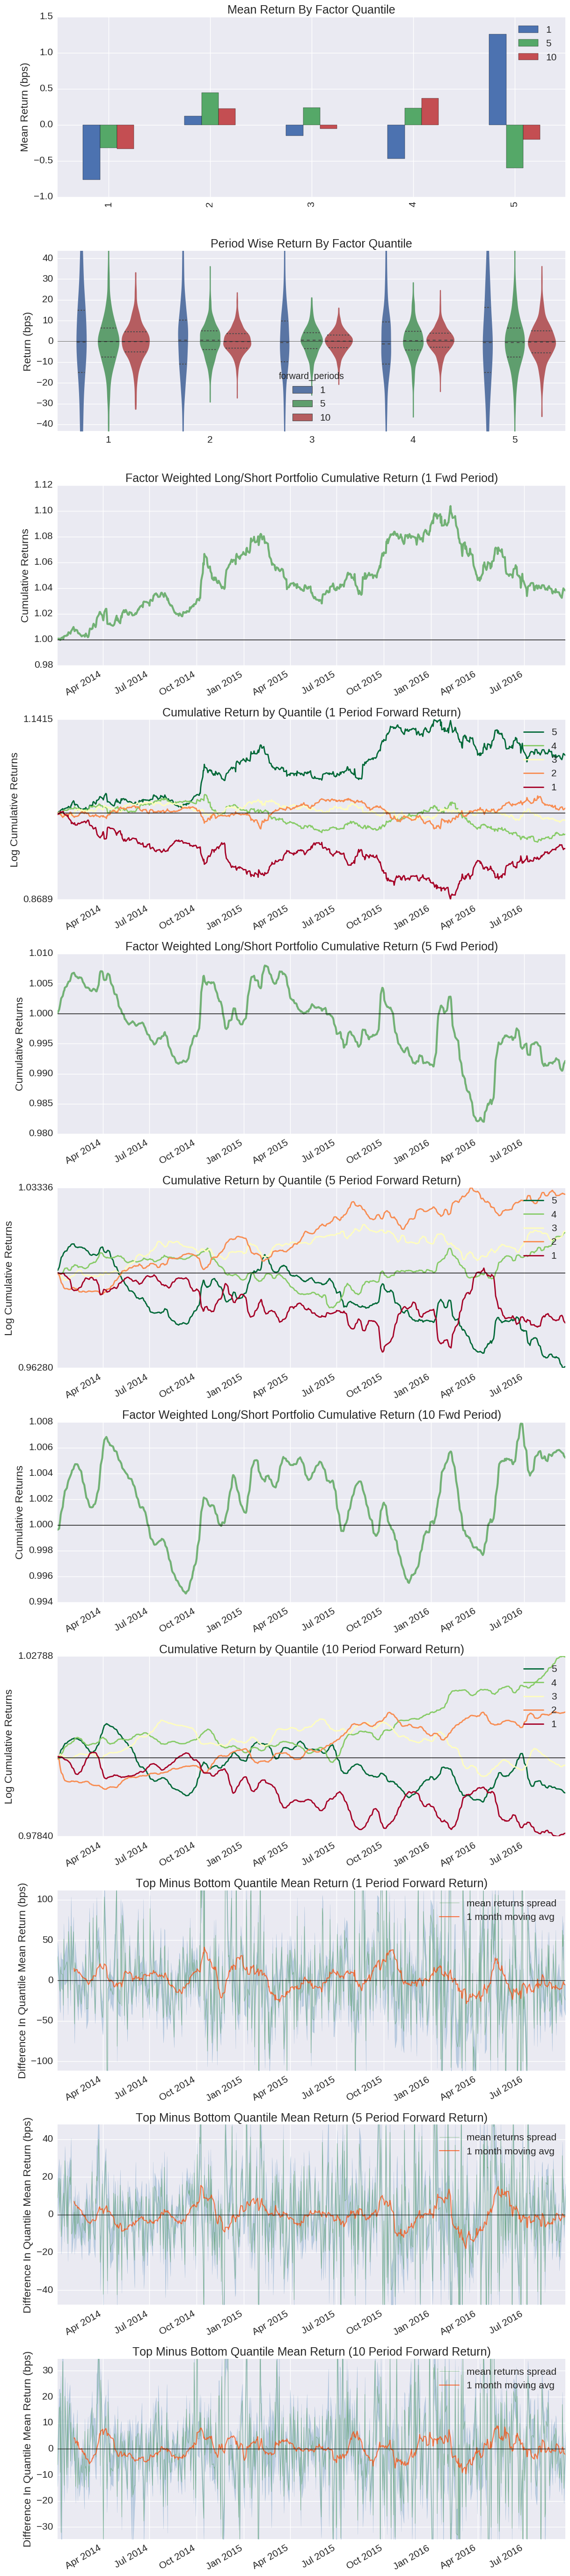

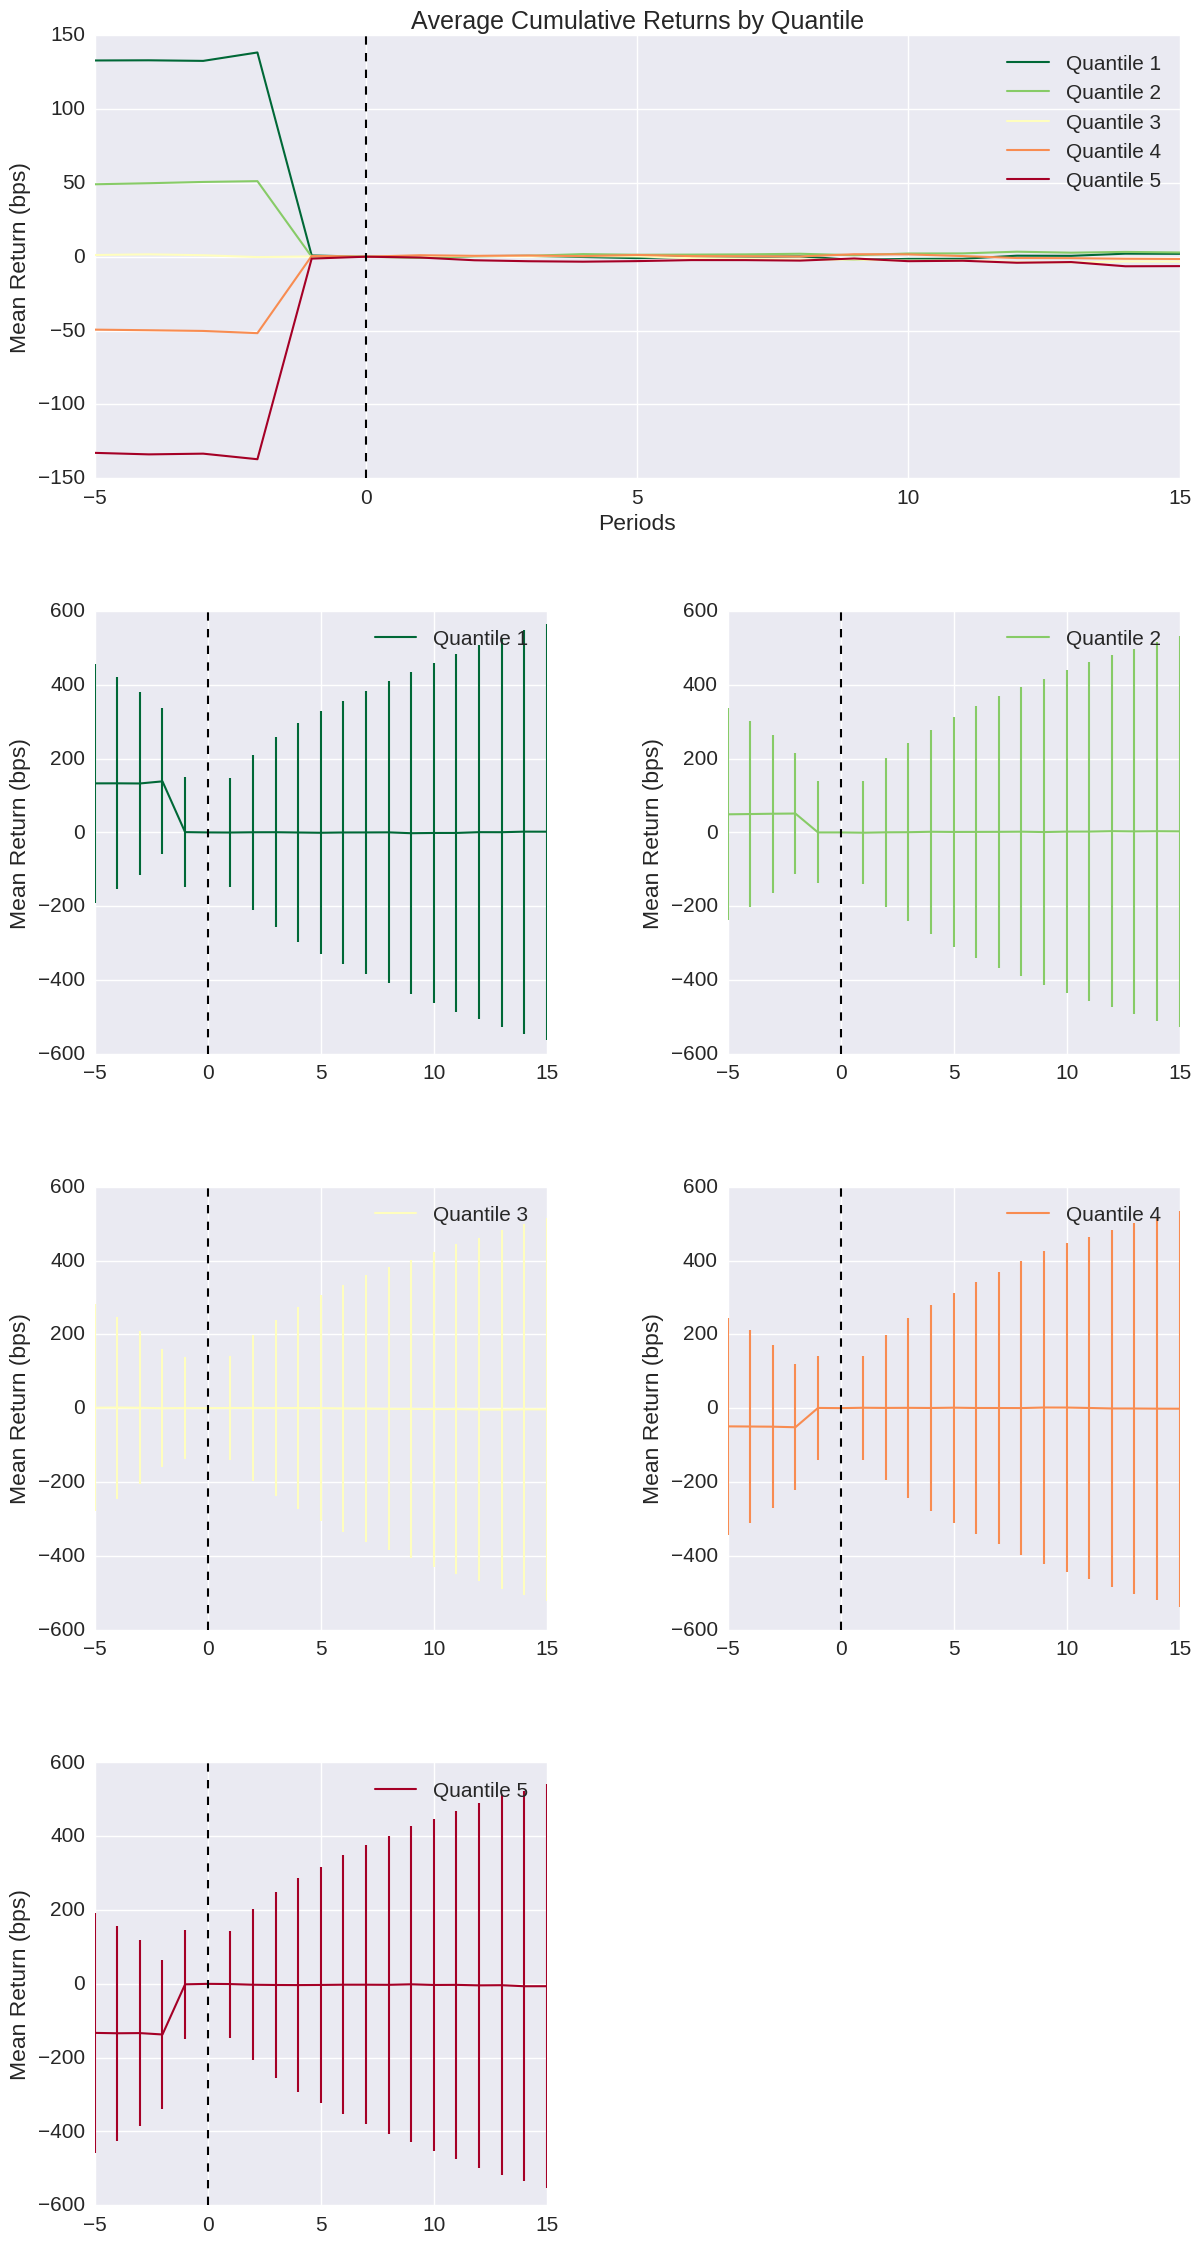

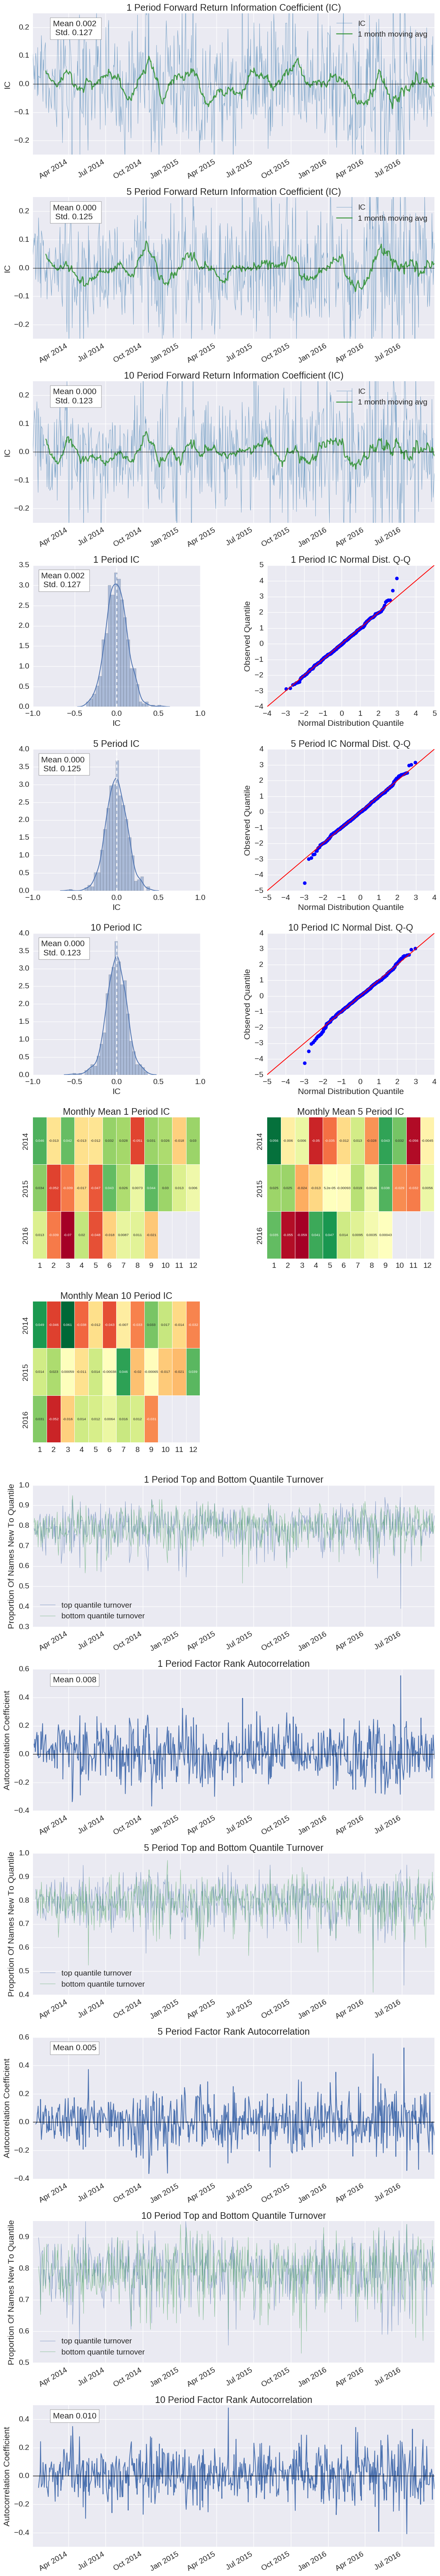

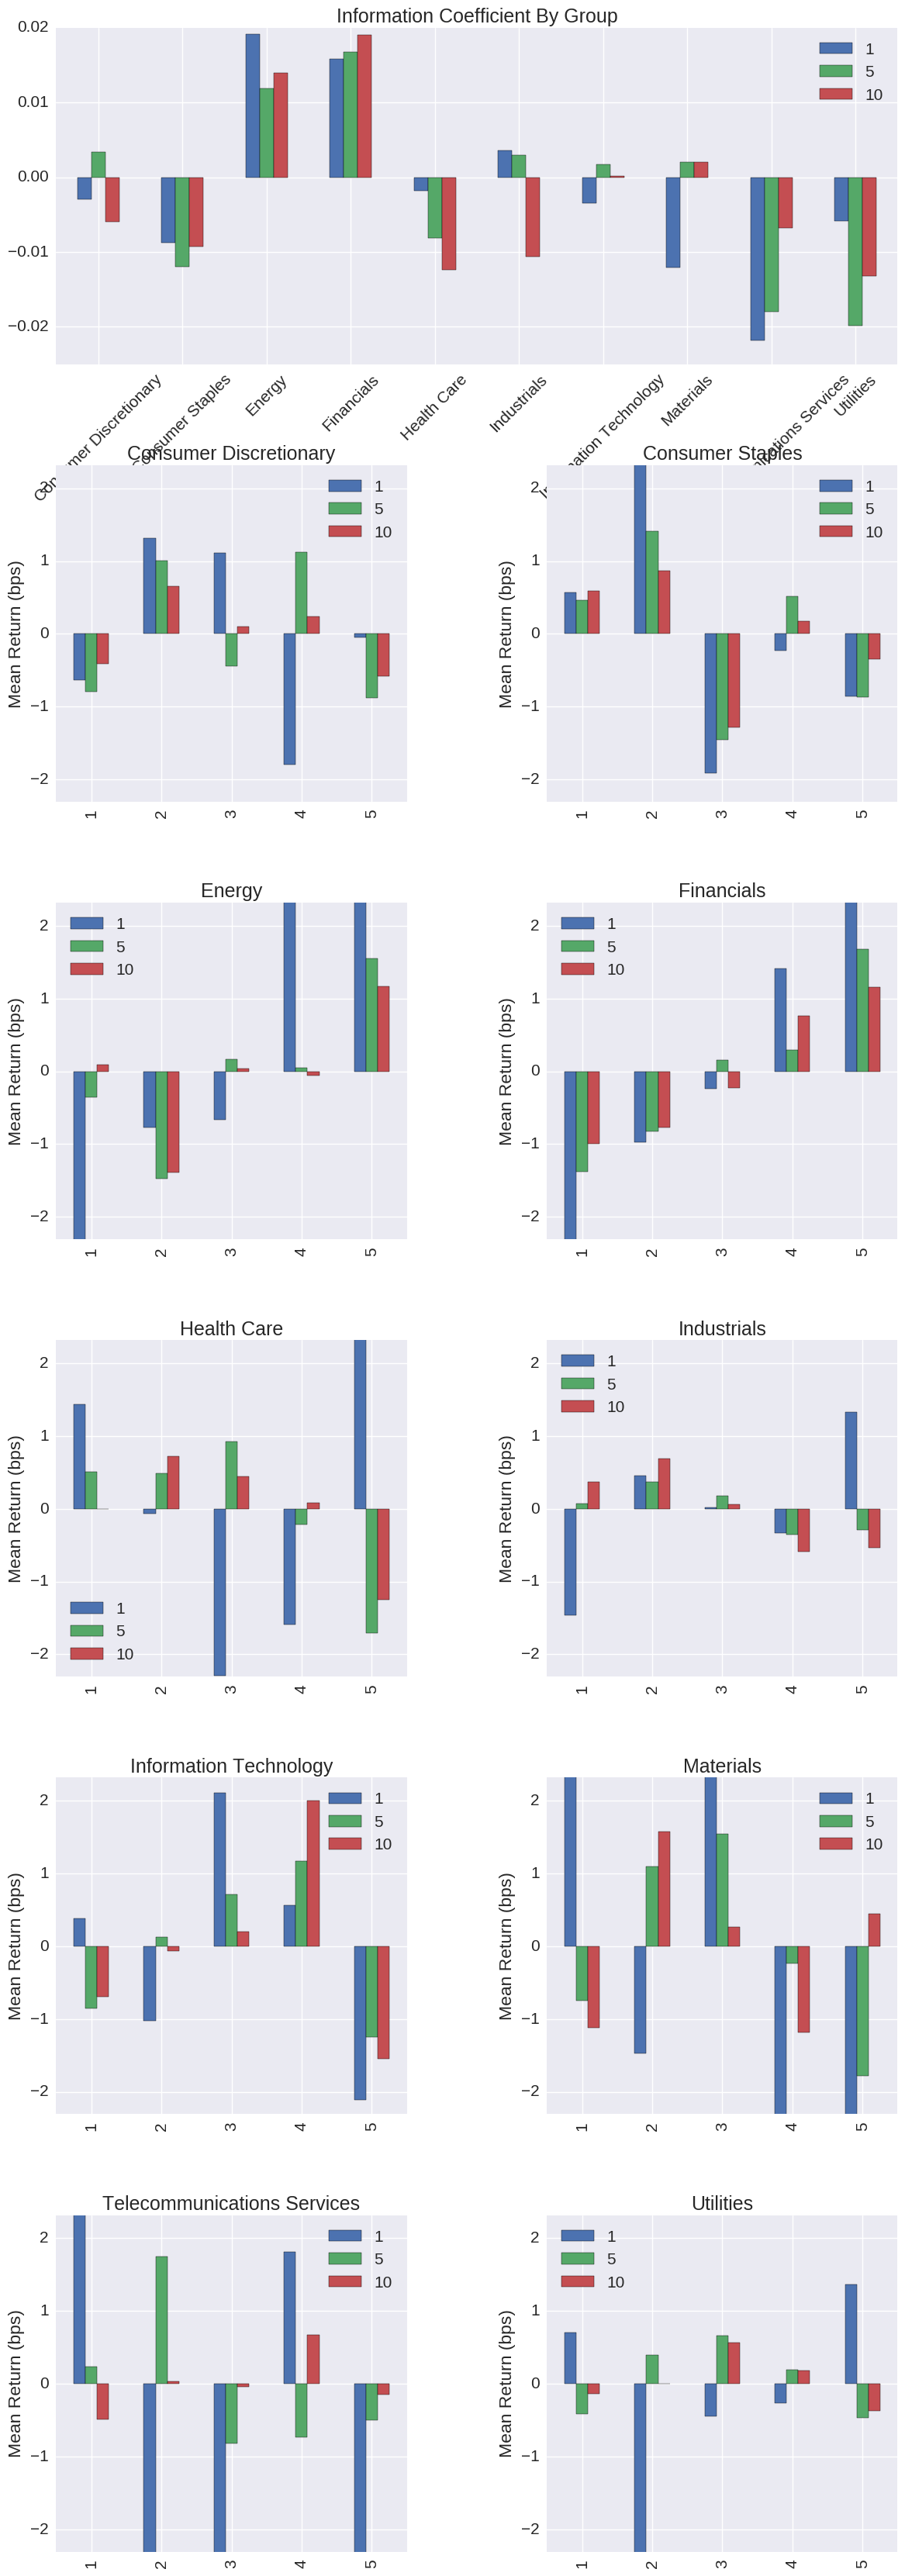

In [69]:
alphalens.tears.create_factor_tear_sheet(momentum_factor, pricing, groupby=ticker_sector,
                                         groupby_labels=sector_names, turnover_for_all_periods=True)